https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4/notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("survey lung cancer.csv")

In [4]:
print(f"Shape of The Dataset : {data.shape}")

data.head()

Shape of The Dataset : (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [7]:
#O resultado (Cancer / nao cancer) é um objeto, para incluir ele fazemos:
data.describe(include=object)

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [8]:
#Nao temos dados nulos
data.isna().sum().to_frame().T

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#Para melhor visualização vou substituir os valores int64 para valores binarios (sim / nao)
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Masc" , "F" : "Fem"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Sim" , 1 : "Nao"})

data_temp["LUNG_CANCER"] = data_temp["LUNG_CANCER"].replace({"YES": "Sim", "NO": "Nao"})

data_temp.head()  

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Masc,69,Nao,Sim,Sim,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,Masc,74,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Sim
2,Fem,59,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Nao,Sim,Nao
3,Masc,63,Sim,Sim,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim,Sim,Nao
4,Fem,63,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Sim,Nao,Nao,Nao


In [10]:
# Observar o pq de uma pessoa ter cancer
data_posit = data_temp[data_temp['LUNG_CANCER'] == "Sim"]
data_posit.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Masc,69,Nao,Sim,Sim,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,Masc,74,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Sim,Sim
5,Fem,75,Nao,Sim,Nao,Nao,Sim,Sim,Sim,Sim,Nao,Sim,Sim,Nao,Nao,Sim
6,Masc,52,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Sim,Sim,Sim,Nao,Sim,Sim
7,Fem,51,Sim,Sim,Sim,Sim,Nao,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Nao,Sim


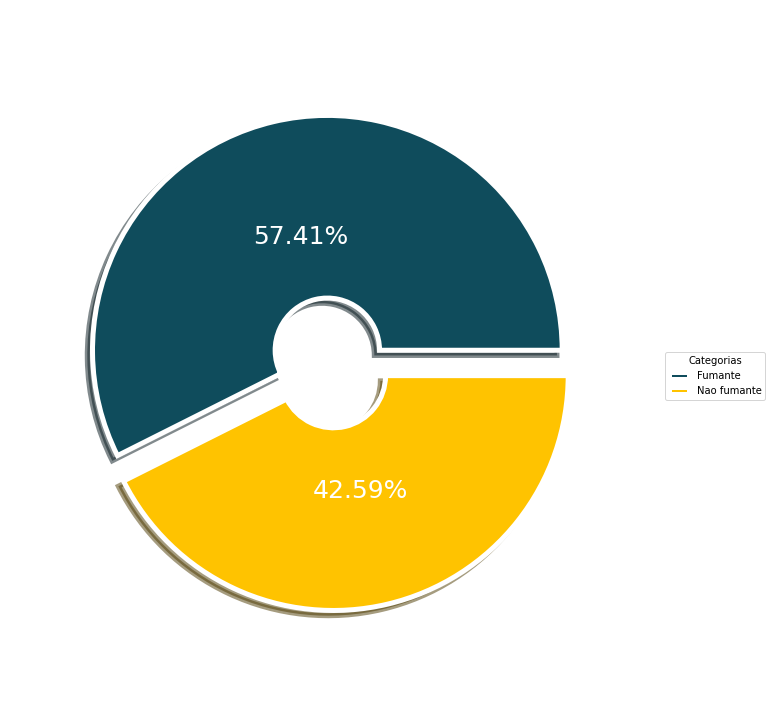

In [11]:
plt.subplots(figsize=(12, 12))

labels = "Fumante","Nao fumante"
size = 0.7

wedges, texts, autotexts = plt.pie([len(data_posit[data_posit["SMOKING"]=="Sim"]["SMOKING"]),
                                    len(data_posit[data_posit["SMOKING"]=="Nao"]["SMOKING"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#0f4c5c","#FFC300"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nDistribuição de casos positivos entre fumantes e não fumantes",fontsize=20, color = "white")
plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

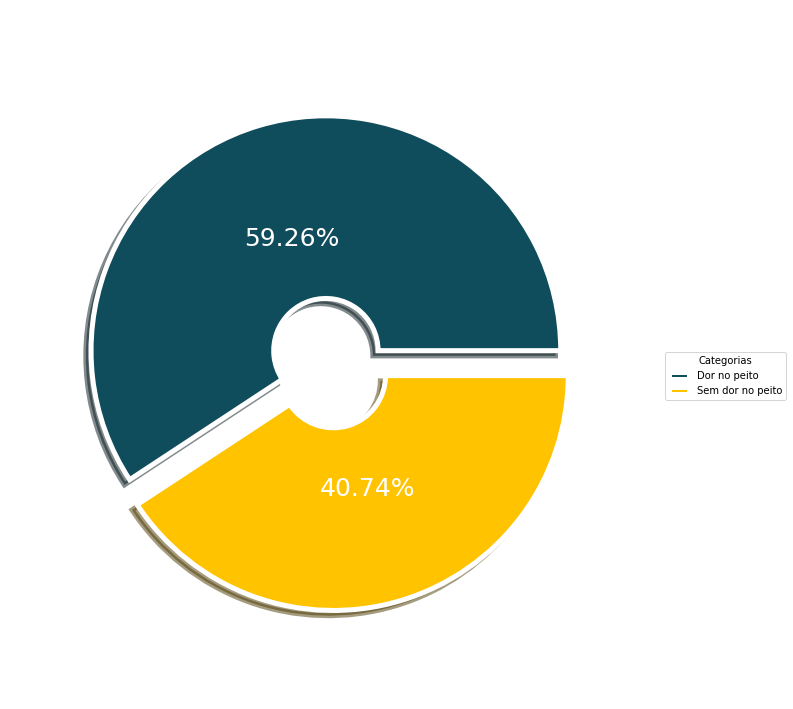

In [12]:
# Vamos tentar achar dados correlacionados
plt.subplots(figsize=(12, 12))

labels = "Dor no peito","Sem dor no peito"
size = 0.7

wedges, texts, autotexts = plt.pie([len(data_posit[data_posit["CHEST PAIN"]=="Sim"]["CHEST PAIN"]),
                                    len(data_posit[data_posit["CHEST PAIN"]=="Nao"]["CHEST PAIN"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#0f4c5c","#FFC300"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nQuantas pessoas com cancer apresentaram dor no peito",fontsize=20, color = "white")
plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

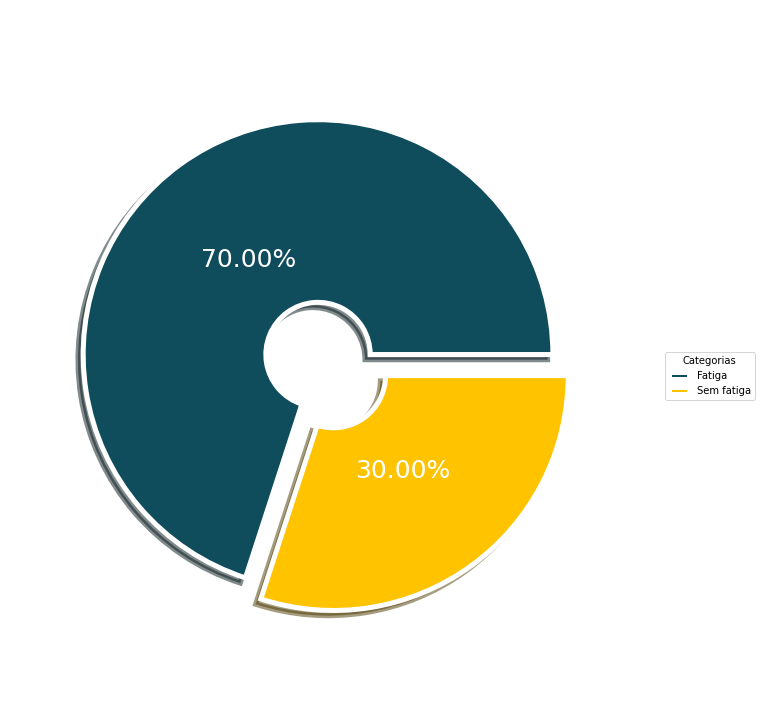

In [13]:
# Vamos tentar achar dados correlacionados
plt.subplots(figsize=(12, 12))

labels = "Fatiga","Sem fatiga"
size = 0.7


wedges, texts, autotexts = plt.pie([len(data_posit[data_posit["FATIGUE "]=="Sim"]["FATIGUE "]),
                                    len(data_posit[data_posit["FATIGUE "]=="Nao"]["FATIGUE "])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#0f4c5c","#FFC300"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Categorias",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nQuantas pessoas com cancer apresentaram fatiga",fontsize=20, color = "white")
plt.show()
#Como esperado, pessoas fumantes tem a tendencia de apresentar cancer no pulmao

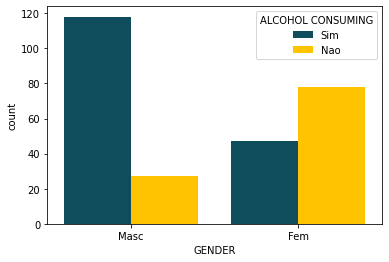

In [36]:
sns.countplot(data=data_posit,x="GENDER",hue="ALCOHOL CONSUMING",hue_order=["Sim","Nao"],palette=["#0f4c5c","#FFC300"],saturation=1)
plt.show()

<AxesSubplot:xlabel='ALCOHOL CONSUMING', ylabel='Percent'>

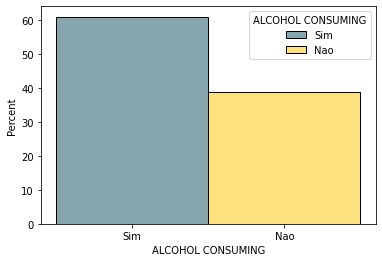

In [53]:
sns.histplot(data=data_posit, x="ALCOHOL CONSUMING", hue="ALCOHOL CONSUMING",hue_order=["Sim","Nao"],palette=["#0f4c5c","#FFC300"], stat='percent')

<AxesSubplot:xlabel='ALCOHOL CONSUMING', ylabel='Percent'>

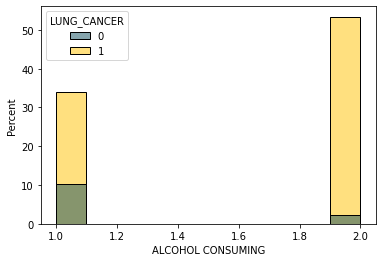

In [64]:
#Podemos ver que os dados estao inversamente correlatados, fazer um plot com os dois graficos lado a lado para todas as classes
sns.histplot(data=data, x="ALCOHOL CONSUMING", hue="LUNG_CANCER",palette=["#0f4c5c","#FFC300"], stat='percent')

In [57]:
import sklearn

In [58]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])

data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


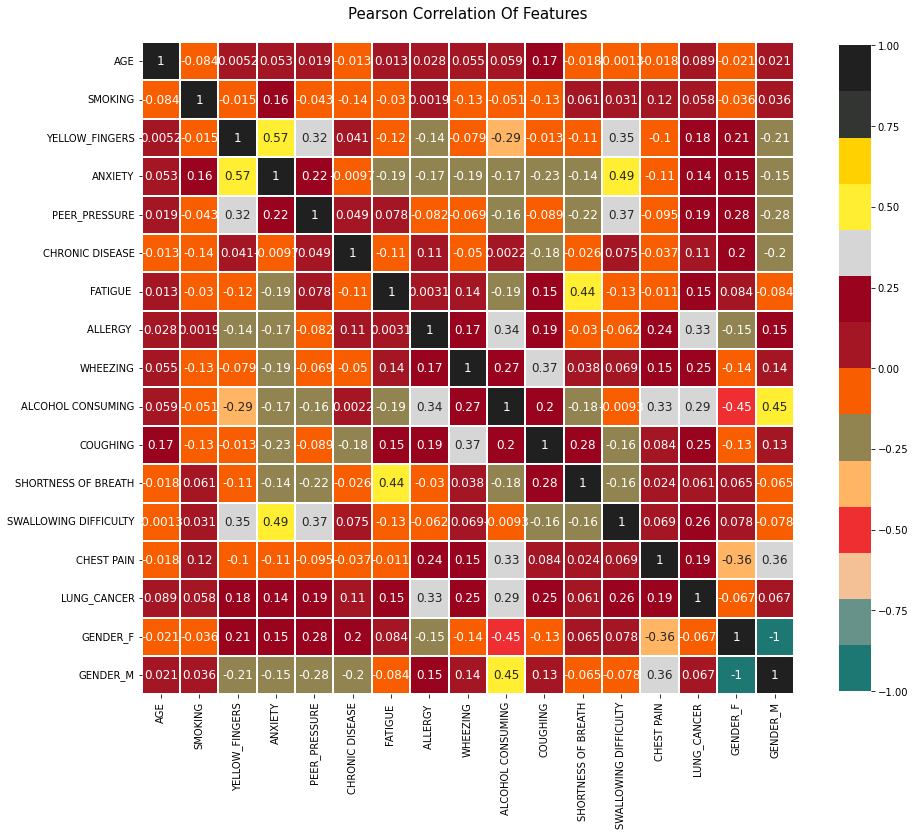

In [60]:
plt.subplots(figsize =(16, 12))

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", size=15)
plt.xticks(rotation=90)
plt.show()